# Heart Disease Prediction 

This project works on the dataset on https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download

About the dataset:
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease. (More details on the link above).

Steps:
   1. Make some data visualization
   2. Create a model to predict whether a patient has a heart disease or not

Nguyen Phuc Huy

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data Visualization

In [2]:
heart_disease=pd.read_csv("data/HeartDiseaseDataset.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
plt.style.use("seaborn-v0_8-bright")

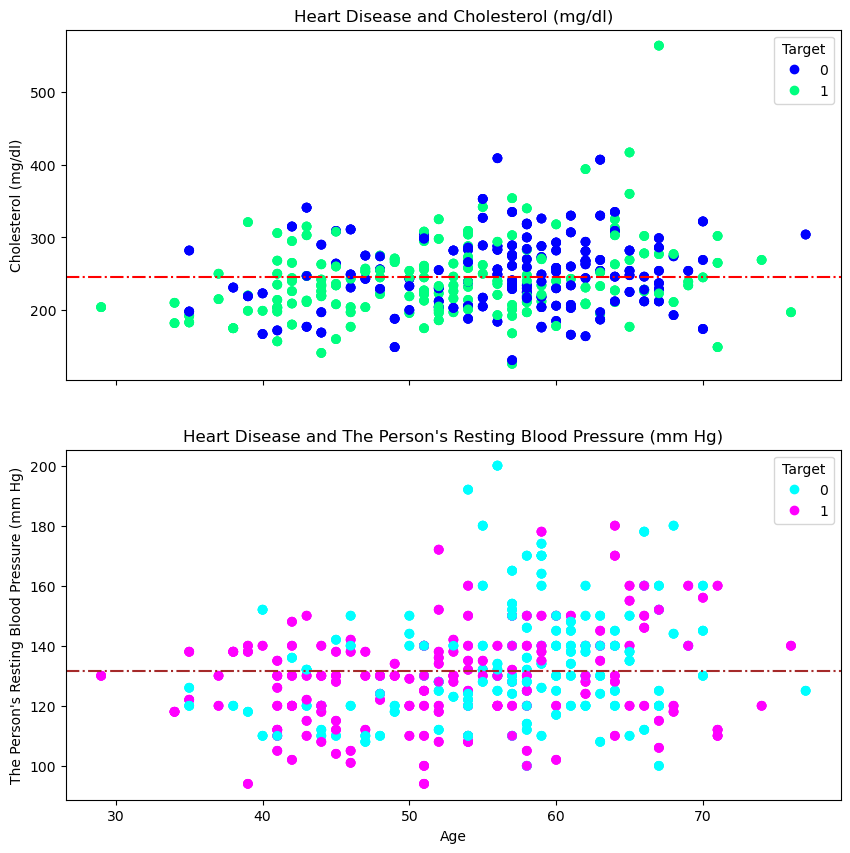

In [4]:
fig,(ax1,ax2)=plt.subplots(figsize=(10,10),sharex=True, nrows=2,ncols=1)

scatter1=ax1.scatter(x=heart_disease["age"],y=heart_disease["chol"],c=heart_disease["target"],cmap="winter")
ax1.set(title="Heart Disease and Cholesterol (mg/dl)",ylabel="Cholesterol (mg/dl)")
ax1.legend(*scatter1.legend_elements(),title="Target")
ax1.axhline(y=heart_disease["chol"].mean(),ls="-.",color="red")

scatter2=ax2.scatter(x=heart_disease["age"],y=heart_disease["trestbps"],c=heart_disease["target"],cmap="cool")
ax2.set(title="Heart Disease and The Person's Resting Blood Pressure (mm Hg)",xlabel="Age",
        ylabel="The Person's Resting Blood Pressure (mm Hg)")
ax2.legend(*scatter2.legend_elements(),title="Target")
ax2.axhline(y=heart_disease["trestbps"].mean(),ls="-.",color="brown")

plt.show()

# 2. Create Predicting Model (RandomForestClassifier)

In [5]:
#Split the data
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]


In [6]:
#Split to training and testing datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [7]:
#Create --> fit a model --> evaluate
from sklearn.ensemble import RandomForestClassifier
for i in range(1,11):
    clf=RandomForestClassifier(max_depth=i)
    clf.fit(X_train,y_train)
    print(f"The accuracy of classifier with max_depth = {i}: {100*clf.score(X_test,y_test):.2f} %")


The accuracy of classifier with max_depth = 1: 86.83 %
The accuracy of classifier with max_depth = 2: 86.83 %
The accuracy of classifier with max_depth = 3: 89.27 %
The accuracy of classifier with max_depth = 4: 90.73 %
The accuracy of classifier with max_depth = 5: 92.68 %
The accuracy of classifier with max_depth = 6: 96.59 %
The accuracy of classifier with max_depth = 7: 99.51 %
The accuracy of classifier with max_depth = 8: 100.00 %
The accuracy of classifier with max_depth = 9: 100.00 %
The accuracy of classifier with max_depth = 10: 100.00 %


In [10]:
# Create final model after evaluation
clf=RandomForestClassifier(max_depth=8)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8)

In [11]:
clf.score(X_test,y_test)

1.0

In [12]:
# Save the model 
import pickle


In [13]:
pickle.dump(clf,open("HeartDiseasePredictor.pkl","wb"))